# Metody Obliczeniowe w Nauce i Technice Laboratorium 8
## Page Rank
### Paweł Gorgolewski

In [65]:
import numpy as np
import networkx as nx
import re
import matplotlib.pyplot as plt

Graph reading from lab2

In [66]:
def parse_graph_date(file_name='graphs.txt'):
    graphs = dict()
    with open(file_name) as f:
        iterator = iter(f.readlines())
        line = next(iterator, None)
        while line:
            name_match = re.match("\[(?P<graph_name>.*)]$", line)
            if name_match:
                graph_name = name_match.group('graph_name')
                line = next(iterator)
                graphs[graph_name] = get_nx_graph(line)

            line = next(iterator, None)

    return graphs


def get_nx_graph(line: str):
    line = line.strip()
    edges_tuples = [eval(edge) for edge in line.split(sep=';')]
    G = nx.DiGraph()
    for edge in edges_tuples:
        G.add_edge(int(edge[0]), int(edge[1]))

    return G

In [67]:
def page_rank(G: nx.Graph):
    A = get_matrix(G)
    r = power_method(A)
    return r


def get_matrix(G: nx.Graph):
    A = nx.to_numpy_array(G)
    for i in range(len(A)):
        suma = sum(A[i])
        if suma > 0:
            A[i] /= suma

    return A.T


def power_method(A, eps=1e-9, iterations=10000): #z lab 7
    n = len(A)
    x = np.random.rand(n)
    count = 0
    while count < iterations:
        count+=1
        x_tmp = np.dot(A, x)
        norm = np.linalg.norm(x_tmp, np.inf)
        x_norm = x_tmp / norm
        if np.linalg.norm(x_norm-x, np.inf) < eps:
            x = x_norm
            break

        x = x_norm

    return x/np.linalg.norm(x, 1)

In [68]:
graphs = parse_graph_date()
G = graphs['spojny10']
result = page_rank(G)
print(f"{result}\n")
print(list(nx.pagerank(G, alpha=1).values()))

[0.22605965 0.05651491 0.0188383  0.06279435 0.01569859 0.02093145
 0.08895866 0.18524333 0.0989011  0.22605965]

[0.2260586258134819, 0.056514245373807434, 0.018838513403330318, 0.06279382387996162, 0.015698705646625153, 0.02093165361320903, 0.08895838657516603, 0.18524303265650005, 0.09890214533665553, 0.22606086770126282]


In [69]:
def draw_graph(G, pos, node_size = 750, font_size = 15, display_node_numbers=True):
    plt.figure(figsize=(20, 15), dpi=80)
    nx.draw_networkx_nodes(G, pos, node_color = 'tab:red', node_size = node_size)
    if display_node_numbers: nx.draw_networkx_labels(G, pos, font_size = font_size, font_color = "black")


    options = {'node_size': node_size}
    nx.draw_networkx_edges(G, pos, **options)

    plt.show()

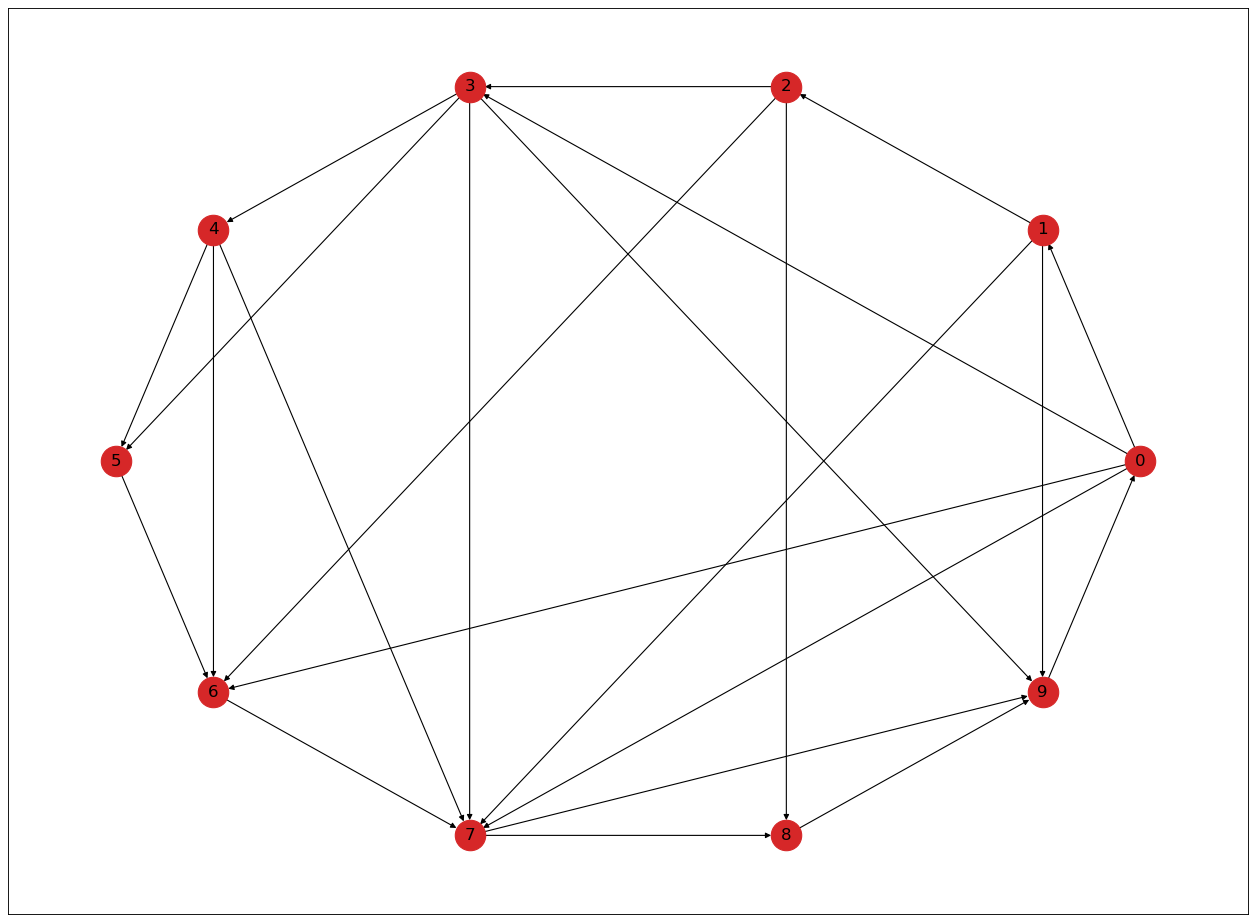

In [70]:
draw_graph(G,nx.circular_layout(G))